<table>
 <tr align=left><td><img align=left src="./images/CC-BY.png">
 <td>Text provided under a Creative Commons Attribution license, CC-BY. All code is made available under the FSF-approved MIT license. (c) Kyle T. Mandli</td>
</table>

In [5]:
%matplotlib inline
from __future__ import print_function
import numpy
import matplotlib.pyplot as plt

# Diferenciación numérica

**Meta:**  Dado una serie de $N+1$ puntos $(x_i, y_i)$ calcular la derivada de un orden determinado.

**Camino:** Define el polinomio de interpolación $P_N(x)$ y derivalo.

### Forma de Newton

Escribimos el polinomio $P_N(x)$ en forma de Newton:

$$P_N(x) = \sum^N_{j=0} a_j n_j(x)$$

en donde 

$$n_j(x) = \prod^{j-1}_{i=0} (x - x_i)$$

Los $a_j = [y_0, \ldots, y_j]$ son diferencias divididas con la siguiente forma

$$[y_i] = y_i \quad i \in \{0,\ldots, N+1\}$$

y

$$[y_i, \ldots , y_{i+j}] = \frac{[y_{i+1}, \ldots , y_{i + j}] - [y_{i},\ldots,y_{i+j-1}]}{x_{i+j} - x_{i}} \quad i \in \{0,\ldots,N+1 - j\} \quad j \in \{1,\ldots, N+1\}$$

Las fórmulas estan definidas en forma recursiva pero aquí se muestran los primeros ejemplos para partir:

$$[y_0] = y_0$$

$$[y_0, y_1] = \frac{y_1 - y_0}{x_1 - x_0}$$

$$[y_0, y_1, y_2] = \frac{[y_1, y_2] - [y_0, y_1]}{x_{2} - x_{0}} = \frac{\frac{y_2 - y_1}{x_2 - x_1} - \frac{y_1 - y_0}{x_1 - x_0}}{x_2 - x_0} = \frac{y_2 - y_1}{(x_2 - x_1)(x_2 - x_0)} - \frac{y_1 - y_0}{(x_1 - x_0)(x_2 - x_0)}$$

El beneficio de escribir el polinomio de esta forma es que queda aislada la dependencia de $x$ (lo cual facilita tomar la derivada).

En general $P_N(x)$ se puede escribir en la forma de Newton como

$$P_N(x) = y_0 + (x-x_0)[y_0, y_1] + (x - x_0) (x - x_1) [y_0, y_1, y_2] + \cdots + (x-x_0) (x-x_1) \cdots (x-x_{N-1}) [y_0, y_1, \ldots, y_{N}]$$

Un ejemplo concreto es un polinomio cuadratico escrito en la forma de Newton:

$$P_2(x) = [y_0] + (x - x_0) [y_0, y_1] + (x - x_0)(x - x_1) [y_0, y_1, y_2] \\= y_0 + (x - x_0) \frac{y_1 - y_0}{x_1 - x_0} + (x - x_0)(x - x_1) \left ( \frac{y_2 - y_1}{(x_2 - x_1)(x_2 - x_0)} - \frac{y_1 - y_0}{(x_1 - x_0)(x_2 - x_0)} \right )$$


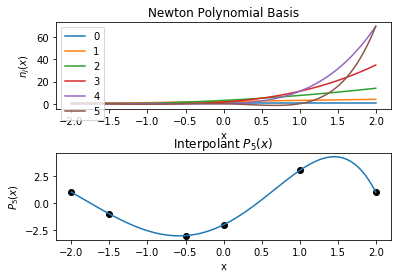

In [14]:
def divided_difference(x, y, N=50):
    """Calcula la diferencia dividida de orden N  usando *x* y *y*"""
    if N == 0:
        raise Exception("Reached recursion limit!")
    
    # Reached the end of the recurssion
    if y.shape[0] == 1:
        return y[0]
    elif y.shape[0] == 2:
        return (y[1] - y[0]) / (x[1] - x[0])
    else:
        return (divided_difference(x[1:], y[1:], N=N-1) - divided_difference(x[:-1], y[:-1], N=N-1)) / (x[-1] - x[0])

    
# Calcula el polinomio en forma de Newton utilizando todos los siguientes puntos
data = numpy.array([[-2.0, 1.0], [-1.5, -1.0], [-0.5, -3.0], [0.0, -2.0], [1.0, 3.0], [2.0, 1.0]])
N = data.shape[0] - 1
x = numpy.linspace(-2.0, 2.0, 100)

# Construye las funciones base
newton_basis = numpy.ones((N + 1, x.shape[0]))
for j in range(N + 1):
    for i in range(j):
        newton_basis[j, :] *= (x - data[i, 0])

# Construye el polinomio
P = numpy.zeros(x.shape)
for j in range(N + 1):
    P += divided_difference(data[:j + 1, 0], data[:j + 1, 1]) * newton_basis[j, :]
    
# Plot basis and interpolant
fig = plt.figure()
fig.subplots_adjust(hspace=.5)

axes = [None, None]
axes[0] = fig.add_subplot(2, 1, 1)
axes[1] = fig.add_subplot(2, 1, 2)

for j in range(N + 1):
    axes[0].plot(x, newton_basis[j, :],label=str(j))
    axes[1].plot(data[j, 0], data[j, 1],'ko')
axes[1].plot(x, P)

axes[0].set_title("Newton Polynomial Basis")
axes[0].set_xlabel("x")
axes[0].set_ylabel("$n_j(x)$")
axes[0].legend(loc=2)

axes[1].set_title("Interpolant $P_%s(x)$" % N)
axes[1].set_xlabel("x")
axes[1].set_ylabel("$P_%s(x)$" % N)

plt.show()

### Analisis de error

Dado $N + 1$ puntos podemos crear un polinomio $P_N(x)$ de grado $N$ que aproxima  la función exacta $f(x)$ 

$$f(x) = P_N(x) + R_N(x)$$

Como visto en integración numérica el teorema de Lagrange define el termino remanente $R_N(x)$ como 

$$R_N(x) = (x - x_0)(x - x_1)\cdots (x - x_{N})(x - x_{N+1}) \frac{f^{(N+1)}(c)}{(N+1)!}$$


#### Ahora calcularemos una aproximación a la derivada

El polinomio es:

$$P_N(x) = y_0 + (x-x_0)[y_0, y_1] + (x - x_0) (x - x_1) [y_0, y_1, y_2] + \cdots + (x-x_0) (x-x_1) \cdots (x-x_{N-1}) [y_0, y_1, \ldots, y_{N}]$$

y su derivada:

$$P_N'(x) = [y_0, y_1] + ((x - x_1) + (x - x_0)) [y_0, y_1, y_2] + \cdots + \left(\sum^{N-1}_{i=0}\left( \prod^{N-1}_{j=0,~j\neq i} (x - x_j) \right )\right ) [y_0, y_1, \ldots, y_N]$$

De la misma forma se puede derivar el termino remanente $R_N(x)$

$$R_N'(x) = \left(\sum^{N}_{i=0} \left( \prod^{N}_{j=0,~j\neq i} (x - x_j) \right )\right ) \frac{f^{(N+1)}(c)}{(N+1)!}$$

Ahora podemos evaluar la aproximación de la derivada de la función desconocida $f'(x)$ en el punto $(x_k, y_k)$ mediante la siguiente expresión:

$$f'(x_k) = P_N'(x_k) + R_N'(x_k)$$

Si $\Delta x = \max_i |x_k - x_i|$ el termino remanenente sera de orden $\mathcal{O}(\Delta x^N)$ en el límite de  $\Delta x \rightarrow 0$ lo que demustra que este método converge y derivadas de ordenes mayores pueden ser encontradas (ignorando el error numérico del cálculo).

##### Ejemplos

En la práctica solo se utiliza un pequeño número de puntos para obtener la derivada.  

### Ejemplo 1:  Primera diferenicia hacia adelante y atras

Usando dos puntos se puede obtener una expresión de la derivada basada en un polinomio de primer orden:

$$f'(x) \approx P_1'(x) = [y_0, y_1] = \frac{y_1 - y_0}{x_1 - x_0} = \frac{y_1 - y_0}{\Delta x} = \frac{f(x_1) - f(x_0)}{\Delta x}$$

El error esta dado como:

$$R_1'(x) = -\Delta x \frac{f''(c)}{2}$$

Esto se puede aplicar hacia adelante y atras.  Para la diferencia hacias adelante se obtiene para $f'(x_n)$

$$f'(x_n) \approx D_1^+ = \frac{f(x_{n+1}) - f(x_n)}{\Delta x}$$

y para atras

$$f'(x_n) \approx D_1^- = \frac{f(x_n) - f(x_{n-1})}{\Delta x}$$

Estas fórmulas estan directamente relacionda con la definición de la derivada en $x_n$ en el límite $\Delta x \rightarrow 0$.

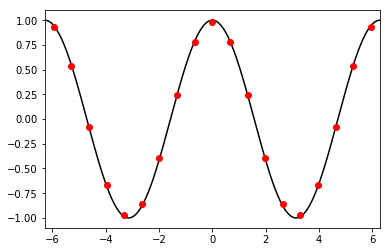

In [15]:
# Ilustración de la derivada numérica en comparación a a la analítica
f = lambda x: numpy.sin(x)
f_prime = lambda x: numpy.cos(x)


x = numpy.linspace(-2 * numpy.pi, 2 * numpy.pi, 1000)
# El intervalo entre 2*pi y -2*pi es divido en 20 segmentos en donde se evaluara la 
# derivada numérica
N = 20
x_hat = numpy.linspace(-2 * numpy.pi, 2 * numpy.pi, N)
# tamaño de paso
delta_x = x_hat[1] - x_hat[0]

# Calcula diferencia hacia adelante en un loop
f_prime_hat = numpy.empty(x_hat.shape)
for i in range(N - 1):
    f_prime_hat[i] = (f(x_hat[i+1]) - f(x_hat[i])) / delta_x
f_prime_hat[-1] = (f(x_hat[-1]) - f(x_hat[-2])) / delta_x

# En el límite del intervalo se usa la diferencia hacia atras
f_prime_hat[-1] = (f(x_hat[-1]) - f(x_hat[-2])) / delta_x  

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.plot(x, f_prime(x), 'k')
axes.plot(x_hat + 0.5 * delta_x, f_prime_hat, 'ro')
axes.set_xlim((x[0], x[-1]))
axes.set_ylim((-1.1, 1.1))

plt.show()

### Ejemplo 2: Diferencia centrada

Ahora usaremos  3 puntos para calcular la diferencia centrada.  Consideramos los puntos $(x_{n}, f(x_{n}))$, $(x_{n-1}, f(x_{n-1}))$, y $(x_{n+1}, f(x_{n+1}))$, y el polinomio queda dado como:

$$\begin{aligned}
    P_2(x) &= [f(x_0)] + (x - x_0) [f(x_0), f(x_1)] + (x - x_0)(x - x_1) [f(x_0), f(x_1), f(x_2)] \\
    &= f(x_0) + (x - x_0) \frac{f(x_1) - f(x_0)}{x_1 - x_0} + (x - x_0)(x - x_1) \left ( \frac{f(x_2) - f(x_1)}{(x_2 - x_1)(x_2 - x_0)} - \frac{f(x_1) - f(x_0)}{(x_1 - x_0)(x_2 - x_0)} \right )
\end{aligned}$$

Calculamos la ecuación de la derivada asumiendo que la **distancia entre los $x_i$ es constante**.

$$\begin{aligned}
    P_2'(x) &= [f(x_n), f(x_{n+1})] + ((x - x_n) + (x - x_{n+1})) [f(x_n), f(x_{n+1}), f(x_{n-1})] \\
    &= \frac{f(x_{n+1}) - f(x_n)}{x_{n+1} - x_n} + ((x - x_n) + (x - x_{n+1})) \left ( \frac{f(x_{n-1}) - f(x_{n+1})}{(x_{n-1} - x_{n+1})(x_{n-1} - x_n)} - \frac{f(x_{n+1}) - f(x_n)}{(x_{n+1} - x_n)(x_{n-1} - x_n)} \right )
\end{aligned}$$

Evaluando en $x_n$ y asumiendo que los puntos $x_{n-1}, x_n, x_{n+1}$ estan **espaciados en forma uniforme** se obtiene

$$\begin{aligned}
    P_2'(x_n) &= \frac{f(x_{n+1}) - f(x_n)}{\Delta x} - \Delta x \left ( \frac{f(x_{n-1}) - f(x_{n+1})}{2\Delta x^2} + \frac{f(x_{n+1}) - f(x_n)}{\Delta x^2} \right ) \\
    &=\frac{f(x_{n+1}) - f(x_n)}{\Delta x} - \left ( \frac{f(x_{n+1}) - 2f(x_n) + f(x_{n-1})}{2\Delta x}\right ) \\
    &=\frac{2f(x_{n+1}) - 2f(x_n) - f(x_{n+1}) + 2f(x_n) - f(x_{n-1})}{2 \Delta x} \\
    &=\frac{f(x_{n+1}) - f(x_{n-1})}{2 \Delta x}
\end{aligned}$$

Esta diferencia finita es de segundo orden y esta centrada en el punto en el cual se pretende aproximar la derivada ($x_n$). Se puede demostrar que es de segundo orden analizando el termino remanente:

$$\begin{aligned}
    R_2'(x) &= \left(\sum^{2}_{i=0} \left( \prod^{2}_{j=0,~j\neq i} (x - x_j) \right )\right ) \frac{f'''(c)}{3!} \\
    &= \left ( (x - x_{n+1}) (x - x_{n-1}) + (x-x_n) (x-x_{n-1}) + (x-x_n)(x-x_{n+1}) \right ) \frac{f'''(c)}{3!}
\end{aligned}$$

Evaluando esta expresión en $x = x_n$ se puede obtener

$$R_2'(x_n) = -\Delta x^2 \frac{f'''(c)}{3!}$$

mostrando que el error es  $\mathcal{O}(\Delta x^2)$.

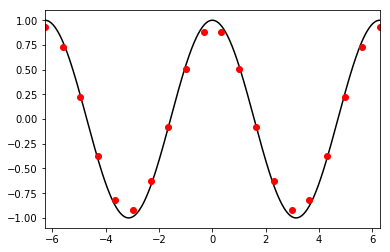

In [16]:
f = lambda x: numpy.sin(x)
f_prime = lambda x: numpy.cos(x)

# Use uniform discretization
x = numpy.linspace(-2 * numpy.pi, 2 * numpy.pi, 1000)
N = 20
x_hat = numpy.linspace(-2 * numpy.pi, 2 * numpy.pi, N)
delta_x = x_hat[1] - x_hat[0]

# Se calcula la diferencia centrada
f_prime_hat = numpy.empty(x_hat.shape)
f_prime_hat[1:-1] = (f(x_hat[2:]) - f(x_hat[:-2])) / (2 * delta_x)

# Para los límites se usa la diferencia hacia atras y adelante
f_prime_hat[0] = (f(x_hat[1]) - f(x_hat[0])) / delta_x     # hacia adelante en x_0
f_prime_hat[-1] = (f(x_hat[-1]) - f(x_hat[-2])) / delta_x  # hacia atras en x_N
# f_prime_hat[0] = (-3.0 * f(x_hat[0]) + 4.0 * f(x_hat[1]) - f(x_hat[2])) / (2.0 * delta_x)
# f_prime_hat[-1] = (3.0 * f(x_hat[-1]) - 4.0 * f(x_hat[-2]) + f(x_hat[-3])) / (2.0 * delta_x)

fig = plt.figure()
plt.rcdefaults()
axes = fig.add_subplot(1, 1, 1)

axes.plot(x, f_prime(x), 'k')
axes.plot(x_hat, f_prime_hat, 'ro')
axes.set_xlim((x[0], x[-1]))
# axes.set_ylim((-1.1, 1.1))

plt.show()

### Derivación alternativa a través de la serie de Taylor

Expandenmos la función en el punto $x_n$ por una serie de Taylor:

$$f(x) = f(x_n) + (x - x_n) f'(x_n) + \frac{(x - x_n)^2}{2!} f''(x_n) + \frac{(x - x_n)^3}{3!} f'''(x_n) + \mathcal{O}((x - x_n)^4)$$

Usamos la serie de para obtener los valores $(x_{n+1}, f(x_{n+1})$ y $(x_{n-1}, f(x_{n-1})$:

$$\begin{aligned}
    f(x_{n+1}) &= f(x_n) + (x_{n+1} - x_n) f'(x_n) + \frac{(x_{n+1} - x_n)^2}{2!} f''(x_n) + \frac{(x_{n+1} - x_n)^3}{3!} f'''(x_n) + \mathcal{O}((x_{n+1} - x_n)^4) \\
    &= f(x_n) + \Delta x f'(x_n) + \frac{\Delta x^2}{2!} f''(x_n) + \frac{\Delta x^3}{3!} f'''(x_n) + \mathcal{O}(\Delta x^4)
\end{aligned}$$

and

$$f(x_{n-1}) = f(x_n) + (x_{n-1} - x_n) f'(x_n) + \frac{(x_{n-1} - x_n)^2}{2!} f''(x_n) + \frac{(x_{n-1} - x_n)^3}{3!} f'''(x_n) + \mathcal{O}((x_{n-1} - x_n)^4) $$

$$ = f(x_n) - \Delta x f'(x_n) + \frac{\Delta x^2}{2!} f''(x_n) - \frac{\Delta x^3}{3!} f'''(x_n) + \mathcal{O}(\Delta x^4) $$

Combinamos estas expresiones en una expresión para la derivada e $x_n$:

$$
    f'(x_n) + R(x_n) = A f(x_{n+1}) + B f(x_n) + C f(x_{n-1})
$$

en donde $R(x_n)$ es el termino remanente.  Reemplazando las expresiones para $f(x_{n+1})$ y $f(x_{n-1})$ se obtiene

$$\begin{aligned}
    f'(x_n) + R(x_n) &= A \left ( f(x_n) + \Delta x f'(x_n) + \frac{\Delta x^2}{2!} f''(x_n) + \frac{\Delta x^3}{3!} f'''(x_n) + \mathcal{O}(\Delta x^4)\right ) \\
    & + B f(x_n) \\ 
    & + C \left ( f(x_n) - \Delta x f'(x_n) + \frac{\Delta x^2}{2!} f''(x_n) - \frac{\Delta x^3}{3!} f'''(x_n) + \mathcal{O}(\Delta x^4) \right )
\end{aligned}$$

Queremos el orden del término remanente sea $R(x_n) = \mathcal{O}(\Delta x^2)$ por lo cual todos los terminos menores a este deben cancelarse salvos lo que multiplican $f'(x_n)$ que deberian sumar 1.  Combinando los terminos similares de  $f(x_n)$ obtenemos expresiones para $A$, $B$, y $C$ basados en que deseamos una derivada de $f'(x_n)$.  Para $n=0$ los terminos $A + B + C$ se hace 0 porque $f(x_n)$ debe cancerlarse.

$$\begin{aligned}
    f(x_n):&  &A + B + C &= 0 \\
    f'(x_n): & &A \Delta x - C \Delta x &= 1 \\
    f''(x_n): & &A \frac{\Delta x^2}{2} + C \frac{\Delta x^2}{2} &= 0
\end{aligned} $$

De la última ecuación se deduce $\Rightarrow A = -C$, que se utiliza en la segunda ecuación para obtener $A = \frac{1}{2 \Delta x}$ y $C = -\frac{1}{2 \Delta x}$ y la primera ecuación da $B = 0$.  El resultado para la derivada es y el error correspondiente es:

$$\begin{aligned}
    f'(x_n) + R(x_n) &= \quad \frac{1}{2 \Delta x} \left ( f(x_n) + \Delta x f'(x_n) + \frac{\Delta x^2}{2!} f''(x_n) + \frac{\Delta x^3}{3!} f'''(x_n) + \mathcal{O}(\Delta x^4)\right ) \\
    & \quad + 0 \cdot f(x_n) \\ 
    & \quad - \frac{1}{2 \Delta x} \left ( f(x_n) - \Delta x f'(x_n) + \frac{\Delta x^2}{2!} f''(x_n) - \frac{\Delta x^3}{3!} f'''(x_n) + \mathcal{O}(\Delta x^4) \right ) \\
    &=  f'(x_n) + \frac{1}{2 \Delta x} \left ( \frac{2 \Delta x^3}{3!} f'''(x_n) + \mathcal{O}(\Delta x^4)\right )
\end{aligned}$$
y encontramos que 
$$
    R(x_n) = \frac{\Delta x^2}{3!} f'''(x_n) + \mathcal{O}(\Delta x^3) = \mathcal{O}(\Delta x^2)
$$

#### La derivada que dada como...


$$\frac{D_1^+(f(x_n)) + D_1^-(f(x_n))}{2} = \frac{f(x_{n+1}) - f(x_n) + f(x_n) - f(x_{n-1})}{2 \Delta x} = \frac{f(x_{n+1}) - f(x_{n-1})}{2 \Delta x}$$

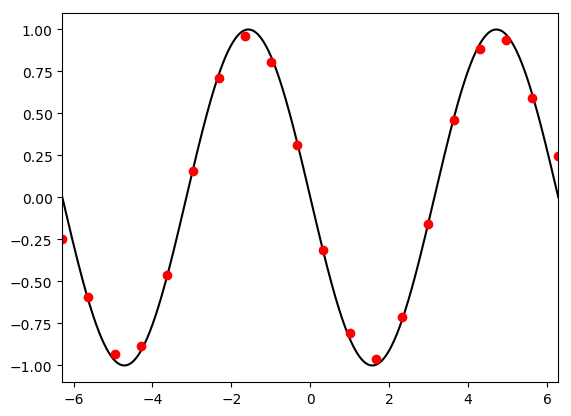

In [18]:
f = lambda x: numpy.sin(x)
f_dubl_prime = lambda x: -numpy.sin(x)

# Discretización uniforme
x = numpy.linspace(-2 * numpy.pi, 2 * numpy.pi, 1000)
N = 20
x_hat = numpy.linspace(-2 * numpy.pi, 2 * numpy.pi, N)
delta_x = x_hat[1] - x_hat[0]

# Compute derivative
f_dubl_prime_hat = numpy.empty(x_hat.shape)
f_dubl_prime_hat[1:-1] = (f(x_hat[2:]) -2.0 * f(x_hat[1:-1]) + f(x_hat[:-2])) / (delta_x**2)

# Use first-order differences for points at edge of domain
f_dubl_prime_hat[0] = (2.0 * f(x_hat[0]) - 5.0 * f(x_hat[1]) + 4.0 * f(x_hat[2]) - f(x_hat[3])) / delta_x**2
f_dubl_prime_hat[-1] = (2.0 * f(x_hat[-1]) - 5.0 * f(x_hat[-2]) + 4.0 * f(x_hat[-3]) - f(x_hat[-4])) / delta_x**2

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.plot(x, f_dubl_prime(x), 'k')
axes.plot(x_hat, f_dubl_prime_hat, 'ro')
axes.set_xlim((x[0], x[-1]))
axes.set_ylim((-1.1, 1.1))

plt.show()